1. Apply PCA to reduce feature dimensionality while maintaining variance.

In [82]:
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv('../data/heart_disease_cleaned.csv')

X = df.drop('target', axis=1)
y = df['target']

pca = PCA()
X_pca = pca.fit_transform(X)

2. Determine the optimal number of principal components using the explained variance ratio.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {n_components_95}")

Optimal number of components to retain 95% variance: 15


3. Visualize PCA results using a scatter plot and cumulative variance plot.

In [84]:
# Apply PCA with optimal number of components
pca = PCA(n_components = n_components_95)
X_pca_optimal = pca.fit_transform(X)

# Convert to DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_pca_optimal.shape[1])]
X_pca_df = pd.DataFrame(X_pca_optimal, columns=pca_columns)
X_pca_df['target'] = y.values

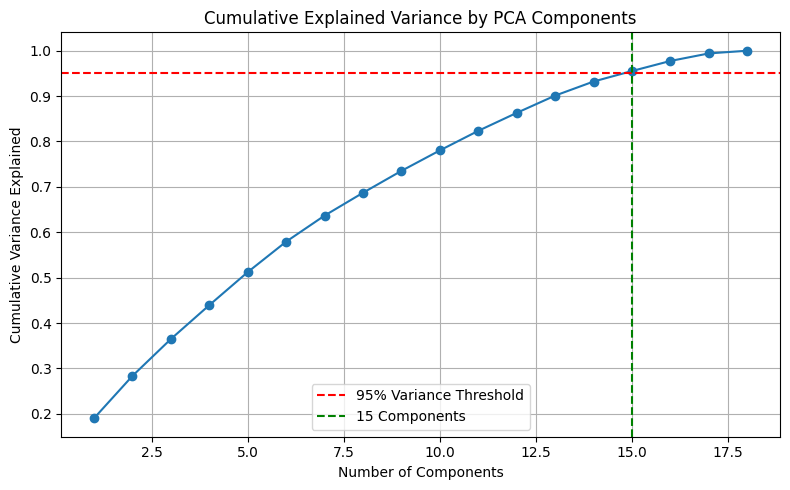

In [85]:
# Cumulative Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

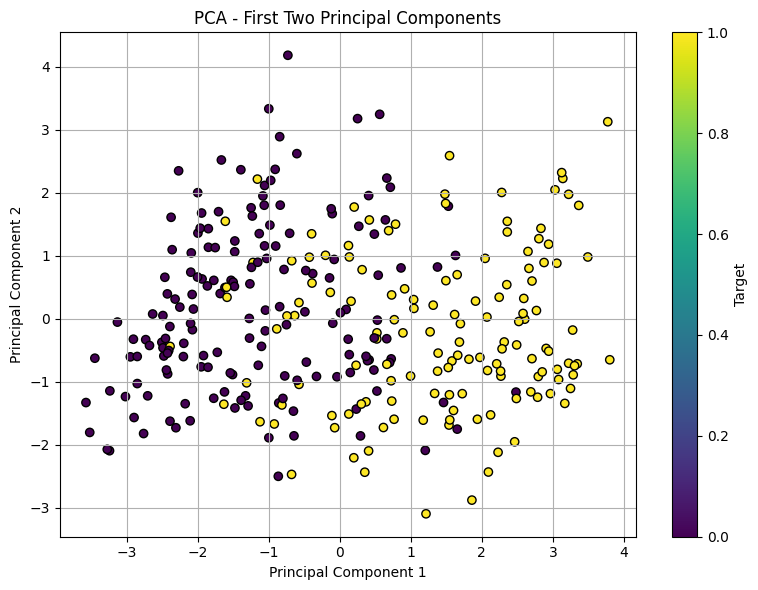

In [ ]:
# 2D Scatter Plot of First Two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Target')
plt.tight_layout()
plt.show()

X_pca_df.to_csv('../data/heart_disease_pca.csv', index=False)